# Loading Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
path = "D:\My Learning Materials\python\Test\dataset.csv"
df = pd.read_csv(path, skiprows=1)

In [4]:
df.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    int64 
 1   Motorway            189 non-null    object
 2   SR                  189 non-null    int64 
 3   NR                  189 non-null    int64 
 4   TR                  189 non-null    int64 
 5   VR                  189 non-null    int64 
 6   SUR1                189 non-null    int64 
 7   SUR2                189 non-null    int64 
 8   SUR3                189 non-null    int64 
 9   UR                  189 non-null    int64 
 10  FR                  189 non-null    int64 
 11  OR                  189 non-null    int64 
 12  RR                  189 non-null    int64 
 13  BR                  189 non-null    int64 
 14  MR                  189 non-null    int64 
 15  CR                  189 non-null    int64 
 16  Green frogs         189 no

## Data Cleaning

### Dealing with null values


We see there is no null value in the data using info method but let's see that differently. there is other pythonic ways to deal with missing data

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ID,0,0.0
RR,0,0.0
Common newt,0,0.0
Tree frog,0,0.0
Fire-bellied toad,0,0.0
Common toad,0,0.0
Brown frogs,0,0.0
Green frogs,0,0.0
CR,0,0.0
MR,0,0.0


As we can see, there is no missing data in the dataset. However, pycaret.Classification.setup method could do the preprocessing very nicely. 

### Reformatting

In [7]:
df.describe()

,ID,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,95.000000,9633.227513,1.566138,4.952381,1.904762,4.232804,5.391534,5.84127,0.841270,0.846561,...,2.502646,0.047619,1.015873,0.571429,0.783069,0.656085,0.306878,0.375661,0.306878,0.111111
std,54.703748,46256.078309,1.544419,5.590918,1.317407,3.434615,3.515185,3.29348,1.315291,1.349843,...,2.640971,0.296894,0.125316,0.496186,0.413250,0.476275,0.462423,0.485580,0.462423,0.315104
min,1.000000,30.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,300.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.00000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,700.000000,1.000000,1.000000,2.000000,2.000000,6.000000,6.00000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,142.000000,3300.000000,1.000000,12.000000,3.000000,7.000000,9.000000,9.00000,3.000000,2.000000,...,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,189.000000,500000.000000,12.000000,15.000000,4.000000,14.000000,11.000000,11.00000,3.000000,4.000000,...,10.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme('notebook'); np.random.seed(0)

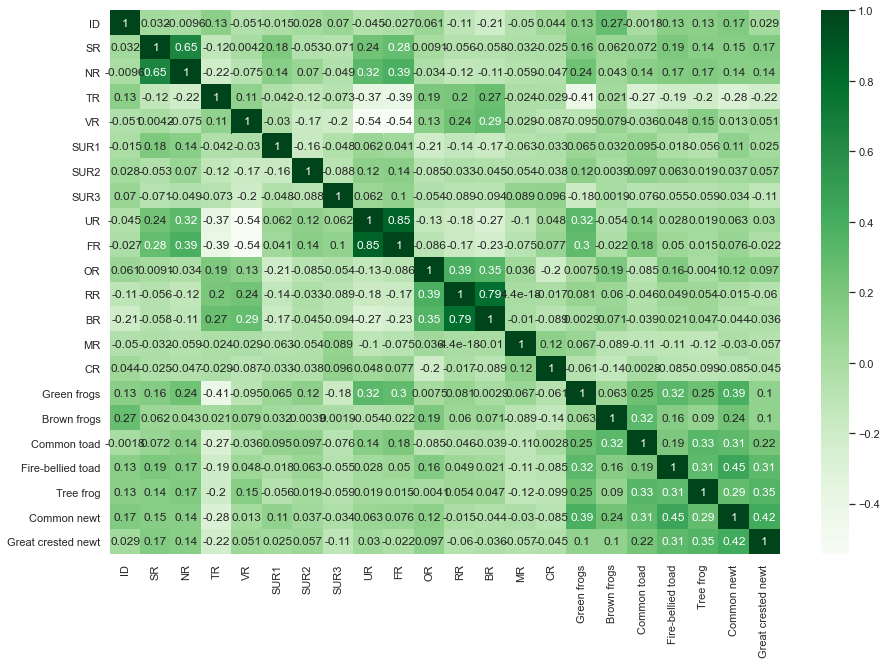

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))
heatmap_correlation = sns.heatmap(data=df.corr(), ax=ax, annot=True, cmap='Greens')

We can see the following data types for the attributes which are quite different with what we have here. I have used describe method and heatmap of correlation between the attributes that are showing the statistical analysis for numeric data while our data types are different, so let's deal with them.

ID -> Integer  |  Motorway -> Categorical  |  SR -> Numerical

NR -> Numerical  |  TR -> Categorical  |  VR -> Categorical

SUR1 -> Categorical  |  SUR2 -> Categorical  |  SUR3 -> Categorical

UR -> Categorical  |  FR -> Categorical  |  OR -> Numerical

RR -> Ordinal  |  BR -> Ordinal  |  MR -> Categorical

CR -> Categorical  | Green frogs -> Categorical; Label 1

Brown frogs -> Categorical; Label 2  |  Common toad -> Categorical; Label 3

Fire-bellied toad -> Categorical; Label 4  |  Tree frog -> Categorical; Label 5

Common newt -> Categorical; Label 6  |  Great crested newt -> Categorical; Label 7

In [10]:
dtype_dict = {
    "ID": "int64", 
    "Motorway": "category", 
    "SR": "float64",
    'NR': "float64",
    'TR': "category",
    'VR': "category",
    'SUR1': "category",
    'SUR2': "category",
    'SUR3': "category",
    'UR': "category",
    'FR': "category",
    'OR': "float64",
    'RR': "category",
    'BR': "category",
    'MR': "category",
    'CR': "category",
    'Green frogs': "category",
    'Brown frogs': "category",
    'Common toad': "category",
    'Fire-bellied toad': "category",
    'Tree frog': "category",
    'Common newt': "category",
    'Great crested newt': "category"
    }

for key, value in dtype_dict.items():
    df[key] = df[key].astype(value)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  189 non-null    int64   
 1   Motorway            189 non-null    category
 2   SR                  189 non-null    float64 
 3   NR                  189 non-null    float64 
 4   TR                  189 non-null    category
 5   VR                  189 non-null    category
 6   SUR1                189 non-null    category
 7   SUR2                189 non-null    category
 8   SUR3                189 non-null    category
 9   UR                  189 non-null    category
 10  FR                  189 non-null    category
 11  OR                  189 non-null    float64 
 12  RR                  189 non-null    category
 13  BR                  189 non-null    category
 14  MR                  189 non-null    category
 15  CR                  189 non-null    cate

Let's look at the heat map and describe method again:

In [12]:
df.describe()

,ID,SR,NR,OR
count,189.000000,189.000000,189.000000,189.000000
mean,95.000000,9633.227513,1.566138,89.962963
std,54.703748,46256.078309,1.544419,19.904926
min,1.000000,30.000000,1.000000,25.000000
25%,48.000000,300.000000,1.000000,99.000000
50%,95.000000,700.000000,1.000000,100.000000
75%,142.000000,3300.000000,1.000000,100.000000
max,189.000000,500000.000000,12.000000,100.000000


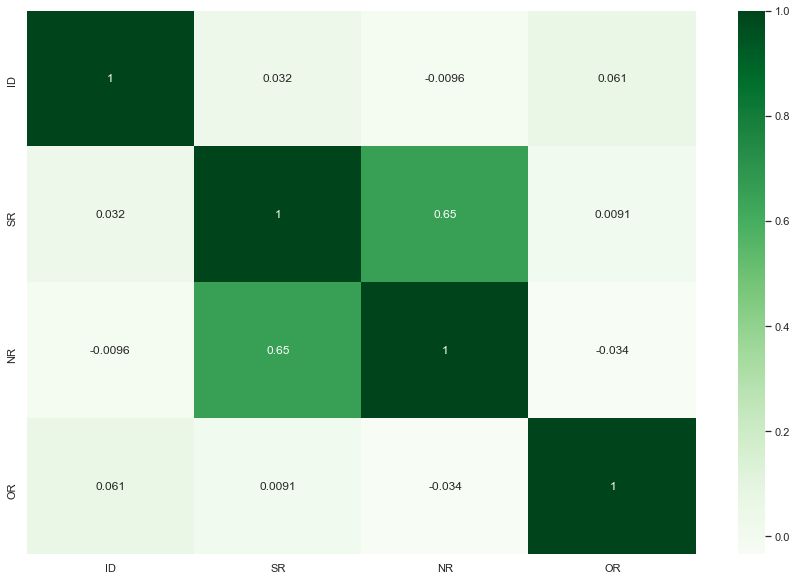

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
heatmap_correlation = sns.heatmap(data=df.corr(), ax=ax, annot=True, cmap='Greens')

##  Univariate Analysis

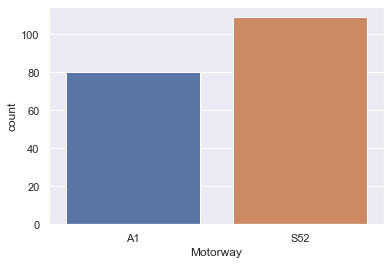

In [14]:
ax = sns.countplot(data=df, x='Motorway')

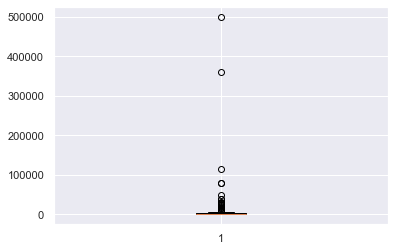

In [15]:
ax = plt.boxplot(data=df, x='SR')
plt.show()

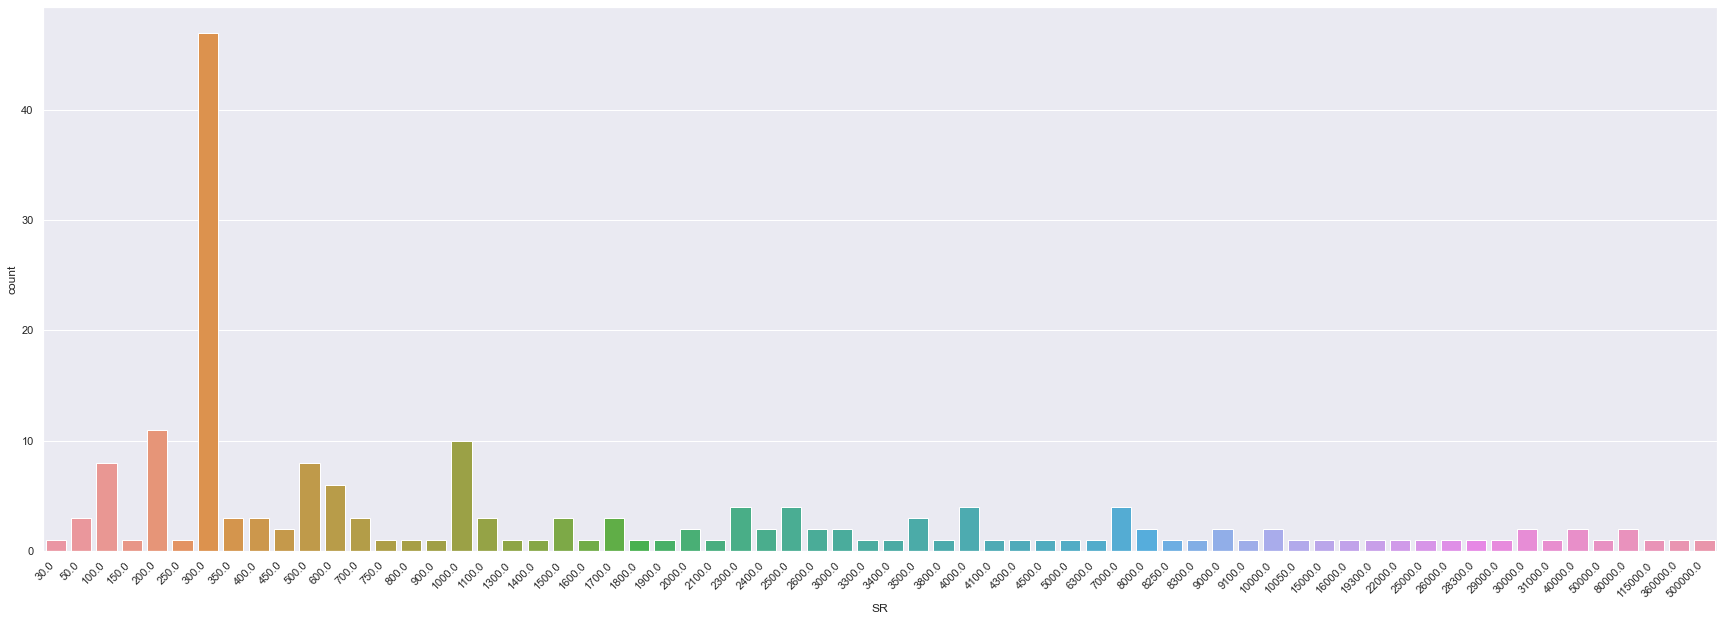

In [16]:
fig, ax = plt.subplots(figsize=(30, 10))
distribution = sns.countplot(data=df, x='SR', ax=ax)
distribution.set_xticklabels(distribution.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

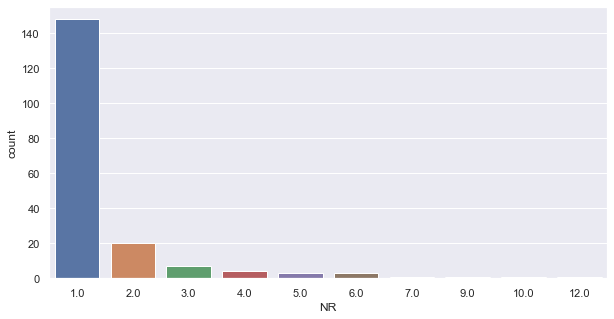

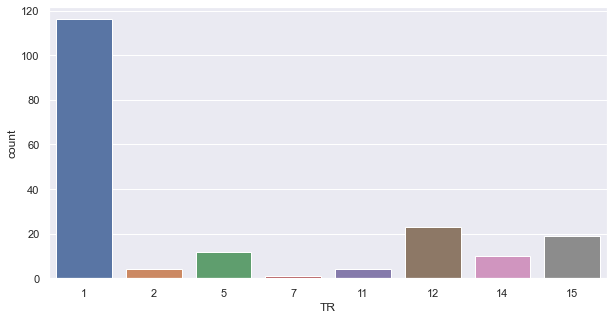

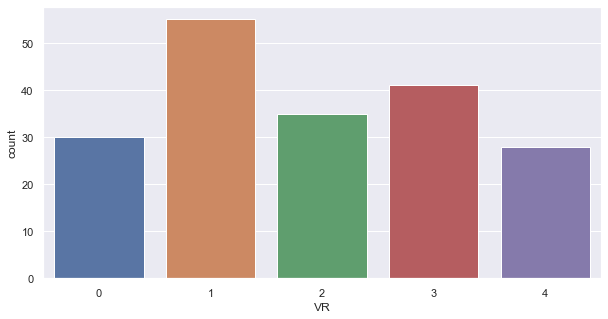

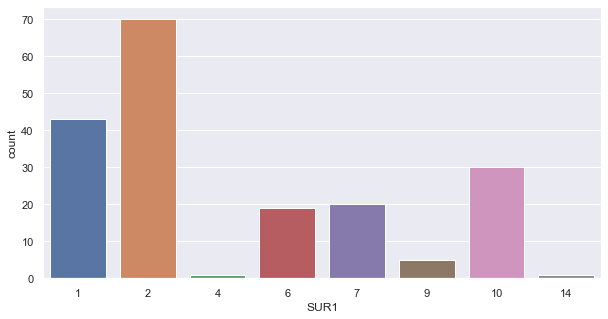

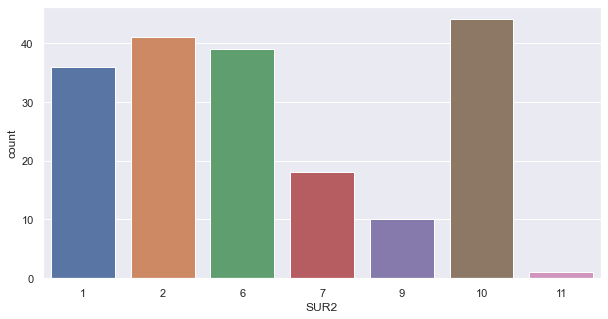

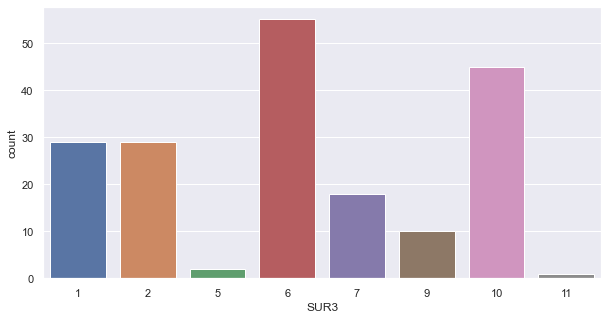

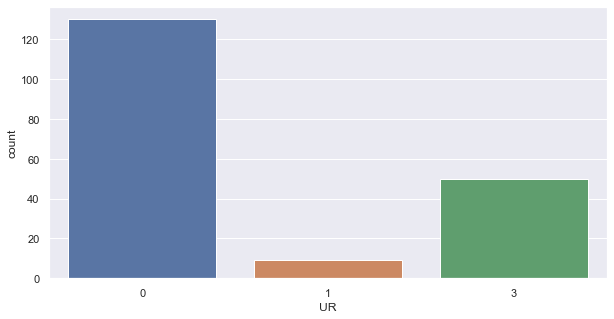

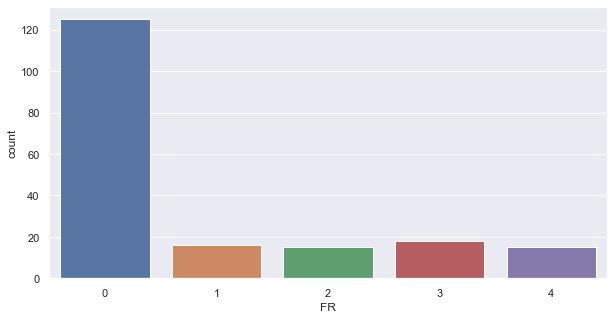

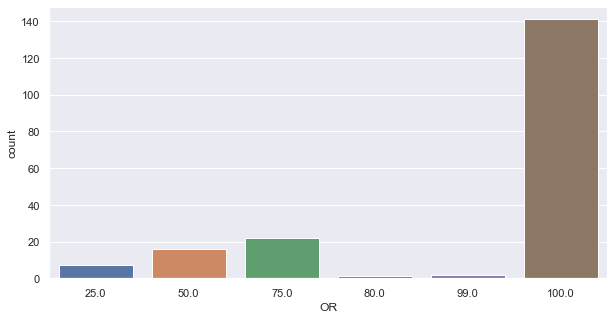

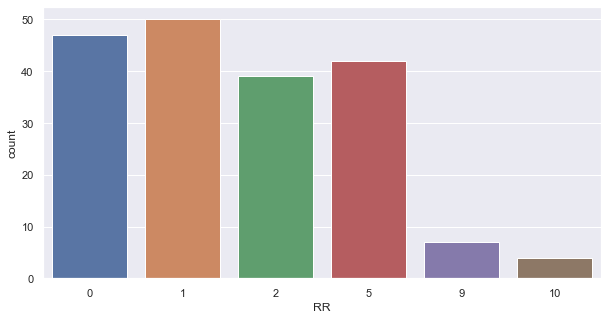

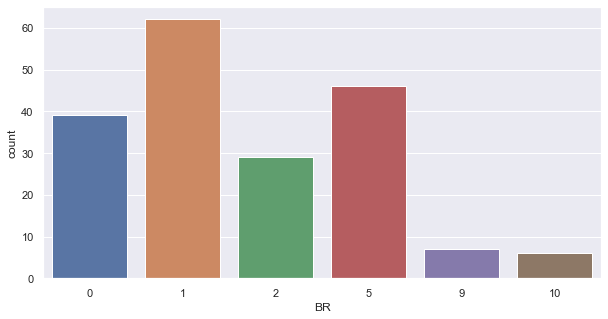

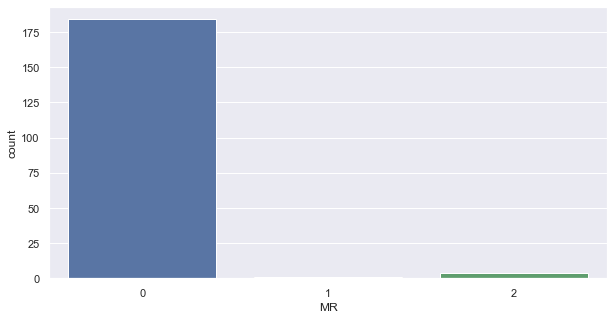

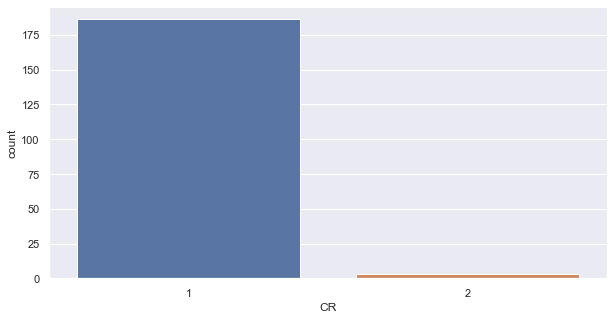

In [17]:
for attr in df.columns[3:-7]:
    fig, ax = plt.subplots(figsize=(10, 5))
    distribution = sns.countplot(data=df, x=attr, ax=ax)
    distribution.set_xticklabels(distribution.get_xticklabels(), rotation=0)
    plt.show()

## Balance/Imbalance Checkup

In [18]:
# preparing the data for charts
x = df.columns[-7:].to_list()
dct = {}
for target in x:
    dct[target] = df[target].value_counts().to_list()

new = pd.DataFrame.from_dict(dct)

#### Show bar charts for each target

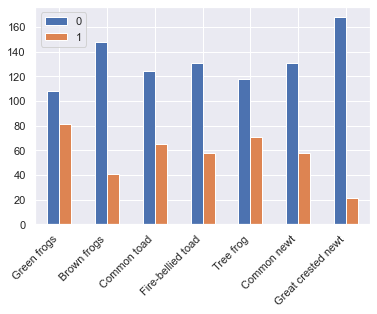

In [19]:
count = new.T.plot(kind='bar')
count.set_xticklabels(count.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [20]:
balanced_target = []
imbalanced_target = []

for target in new.columns:
    y = new[target]
    title_list = ["imbalace", "balance"]
    if y[0] < y[1] // 2 or y[1] < y[0] // 2:
        title = f">> *{target}* is {title_list[0]}"
        imbalanced_target.append(target)
    else:
        title = f"*{target}* is {title_list[1]}"
        balanced_target.append(target)
    print(title)
    print(balanced_target)
    print(imbalanced_target)

*Green frogs* is balance
['Green frogs']
[]
>> *Brown frogs* is imbalace
['Green frogs']
['Brown frogs']
*Common toad* is balance
['Green frogs', 'Common toad']
['Brown frogs']
>> *Fire-bellied toad* is imbalace
['Green frogs', 'Common toad']
['Brown frogs', 'Fire-bellied toad']
*Tree frog* is balance
['Green frogs', 'Common toad', 'Tree frog']
['Brown frogs', 'Fire-bellied toad']
>> *Common newt* is imbalace
['Green frogs', 'Common toad', 'Tree frog']
['Brown frogs', 'Fire-bellied toad', 'Common newt']
>> *Great crested newt* is imbalace
['Green frogs', 'Common toad', 'Tree frog']
['Brown frogs', 'Fire-bellied toad', 'Common newt', 'Great crested newt']


#### Show pie charts for each target but in one figure

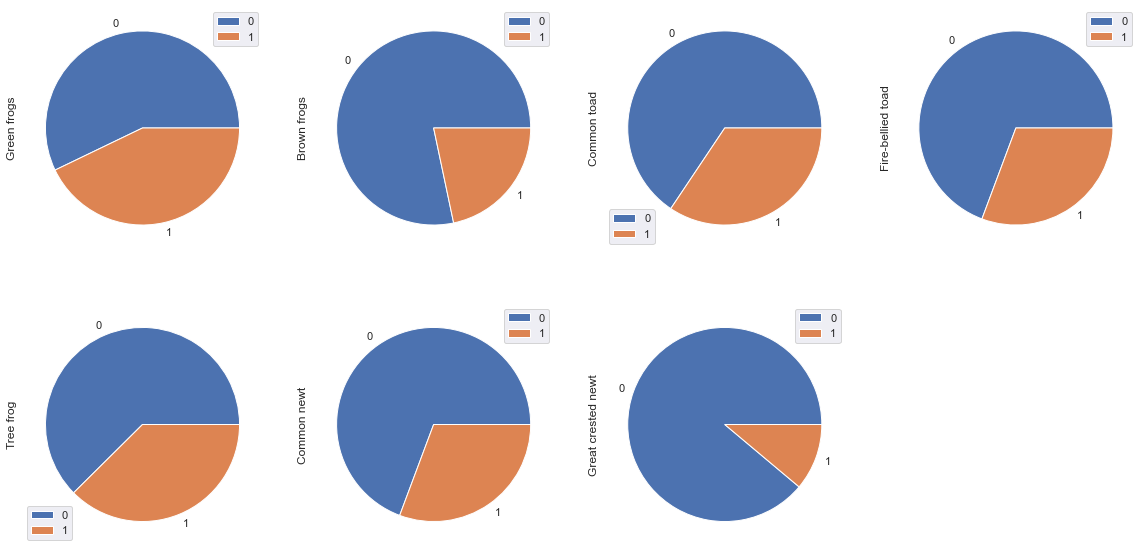

In [40]:
new.plot(kind='pie', subplots=True, figsize=(20, 10), layout=(2, 4))
plt.show()

# ML Modeling

## Data Preparation

In [41]:
data = df.sample(frac=0.8, random_state=786).reset_index(drop=True)
data = data.iloc[:, :-6]
data_unseen = df.drop(data.index).reset_index(drop=True)
data_unseen = data_unseen.iloc[:, :-6]

In [42]:
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (151, 17)
Unseen Data For Predictions: (38, 17)


## Modeling

### Pre-Modeling

Pycaret is a python library. This library has a full machine learning pipeline package from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction, and saving the model for later use.

I will use a balanced target and an imbalanced one to setup two separated pipelines.
It's worth it to be said that "setup" method will make all the pre-processing including one-hot encoding, deal with missing data, etc.


I have seperated the targets into two lists of balanced and imbalanced data when count of one class is less than 50% of another one.

In [43]:
balanced_target

['Green frogs', 'Common toad', 'Tree frog']

In [44]:
imbalanced_target

['Brown frogs', 'Fire-bellied toad', 'Common newt', 'Great crested newt']

I will do the ML pipeline for 'Green frogs' as a candidate of balance data and 'Great crested newt' as a candidate of inbalance one.

In [45]:
from pycaret.classification import *

green_frogs = setup(data = data, target = 'Green frogs', 
                    session_id=123, ignore_features=['ID', 'Motorway'])

,Description,Value
0,session_id,123
1,Target,Green frogs
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(151, 17)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


### Compare all the models

In [47]:
best_model = compare_models(fold=30, n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6750,0.6667,0.7167,0.7444,0.7044,0.3178,0.3407,0.0207
lr,Logistic Regression,0.6611,0.6778,0.7500,0.7306,0.7108,0.2700,0.3010,0.7200
lightgbm,Light Gradient Boosting Machine,0.6583,0.6444,0.7278,0.7444,0.7033,0.3000,0.3292,0.0243
rf,Random Forest Classifier,0.6528,0.7056,0.7167,0.7333,0.6933,0.2378,0.2676,0.2433
et,Extra Trees Classifier,0.6528,0.6750,0.7500,0.6806,0.6908,0.2433,0.2540,0.1827
knn,K Neighbors Classifier,0.6500,0.6500,0.7667,0.6833,0.6989,0.2489,0.2706,0.0437
ridge,Ridge Classifier,0.6417,0.0000,0.7000,0.7250,0.6786,0.2433,0.2702,0.0177
gbc,Gradient Boosting Classifier,0.6250,0.6444,0.6889,0.7167,0.6711,0.1956,0.2184,0.0590
dummy,Dummy Classifier,0.6083,0.5000,1.0000,0.6083,0.7524,0.0000,0.0000,0.0070
qda,Quadratic Discriminant Analysis,0.6028,0.5000,0.9667,0.6083,0.7413,0.0000,0.0052,0.0373


This function trains and scores all models in the model library using stratified *cross-validation* for metric assessment. The output shows the average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC over the folds (10 by default), as well as training durations.

In [54]:
# all models that can be used for classification
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [41]:
for i in range(3):
    print(best_model[i])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n

### Create the selected model

Here, I will try some different models that are not in the comparision

In [64]:
dt = create_model('dt', fold=30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,0.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,0.0000
3,0.7500,0.7500,1.0000,0.6667,0.8000,0.5000,0.5774
4,0.7500,0.7500,0.5000,1.0000,0.6667,0.5000,0.5774
5,0.2500,0.2500,0.5000,0.3333,0.4000,-0.5000,-0.5774
6,0.7500,0.7500,1.0000,0.6667,0.8000,0.5000,0.5774
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.7500,0.7500,1.0000,0.6667,0.8000,0.5000,0.5774


In [50]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [66]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9333,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.7273,0.7167,0.6667,0.8000,0.7273,0.4590,0.4667
2,0.8182,0.7679,0.8571,0.8571,0.8571,0.6071,0.6071
3,0.5455,0.5714,0.5714,0.6667,0.6154,0.0678,0.0690
4,0.8182,0.7857,0.8571,0.8571,0.8571,0.6071,0.6071
5,0.6000,0.6667,0.5000,0.7500,0.6000,0.2308,0.2500
6,0.6000,0.5417,0.6667,0.6667,0.6667,0.1667,0.1667
7,0.6000,0.7500,0.8333,0.6250,0.7143,0.0909,0.1021
8,0.8000,0.7708,0.8333,0.8333,0.8333,0.5833,0.5833


In [69]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6364,0.8000,0.8333,0.6250,0.7143,0.2414,0.2609
1,0.8182,0.9000,0.8333,0.8333,0.8333,0.6333,0.6333
2,0.8182,0.7500,1.0000,0.7778,0.8750,0.5600,0.6236
3,0.5455,0.5357,0.5714,0.6667,0.6154,0.0678,0.0690
4,0.7273,0.7500,0.7143,0.8333,0.7692,0.4407,0.4485
5,0.7000,0.7083,0.6667,0.8000,0.7273,0.4000,0.4082
6,0.6000,0.5000,0.6667,0.6667,0.6667,0.1667,0.1667
7,0.4000,0.4583,0.6667,0.5000,0.5714,-0.3636,-0.4082
8,0.7000,0.8333,0.8333,0.7143,0.7692,0.3478,0.3563


In [53]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6364,0.7667,0.8333,0.6250,0.7143,0.2414,0.2609
1,0.8182,0.7333,0.8333,0.8333,0.8333,0.6333,0.6333
2,0.8182,0.7857,0.8571,0.8571,0.8571,0.6071,0.6071
3,0.6364,0.6429,0.7143,0.7143,0.7143,0.2143,0.2143
4,0.7273,0.8214,0.7143,0.8333,0.7692,0.4407,0.4485
5,0.7000,0.6667,0.6667,0.8000,0.7273,0.4000,0.4082
6,0.5000,0.5417,0.6667,0.5714,0.6154,-0.0870,-0.0891
7,0.5000,0.5000,0.8333,0.5556,0.6667,-0.1905,-0.2722
8,0.9000,0.9167,0.8333,1.0000,0.9091,0.8000,0.8165


In [55]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7273,0.8000,0.8333,0.7143,0.7692,0.4407,0.4485
1,0.6364,0.7667,0.6667,0.6667,0.6667,0.2667,0.2667
2,0.7273,0.6786,0.8571,0.7500,0.8000,0.3774,0.3858
3,0.6364,0.4643,0.7143,0.7143,0.7143,0.2143,0.2143
4,0.6364,0.8571,0.5714,0.8000,0.6667,0.2903,0.3105
5,0.7000,0.6250,0.6667,0.8000,0.7273,0.4000,0.4082
6,0.7000,0.6250,0.8333,0.7143,0.7692,0.3478,0.3563
7,0.4000,0.3750,0.6667,0.5000,0.5714,-0.3636,-0.4082
8,0.7000,0.7917,0.6667,0.8000,0.7273,0.4000,0.4082


In [56]:
lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [57]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6364,0.7500,0.8333,0.6250,0.7143,0.2414,0.2609
1,0.7273,0.8000,1.0000,0.6667,0.8000,0.4211,0.5164
2,0.6364,0.7500,0.8571,0.6667,0.7500,0.1200,0.1336
3,0.6364,0.6607,0.7143,0.7143,0.7143,0.2143,0.2143
4,0.6364,0.6786,0.8571,0.6667,0.7500,0.1200,0.1336
5,0.5000,0.5625,0.6667,0.5714,0.6154,-0.0870,-0.0891
6,0.6000,0.6250,0.8333,0.6250,0.7143,0.0909,0.1021
7,0.6000,0.3750,0.8333,0.6250,0.7143,0.0909,0.1021
8,0.7000,0.9167,0.8333,0.7143,0.7692,0.3478,0.3563


In [58]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6364,0.8000,0.6667,0.6667,0.6667,0.2667,0.2667
1,0.8182,0.8000,0.8333,0.8333,0.8333,0.6333,0.6333
2,0.8182,0.7500,1.0000,0.7778,0.8750,0.5600,0.6236
3,0.5455,0.5714,0.5714,0.6667,0.6154,0.0678,0.0690
4,0.7273,0.7679,0.7143,0.8333,0.7692,0.4407,0.4485
5,0.5000,0.6667,0.6667,0.5714,0.6154,-0.0870,-0.0891
6,0.5000,0.5208,0.8333,0.5556,0.6667,-0.1905,-0.2722
7,0.5000,0.4792,0.8333,0.5556,0.6667,-0.1905,-0.2722
8,0.6000,0.8333,0.8333,0.6250,0.7143,0.0909,0.1021


In [82]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [59]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6364,0.6000,0.6667,0.6667,0.6667,0.2667,0.2667
1,0.8182,0.8500,0.6667,1.0000,0.8000,0.6452,0.6901
2,0.7273,0.6071,1.0000,0.7000,0.8235,0.2979,0.4183
3,0.5455,0.6964,0.4286,0.7500,0.5455,0.1538,0.1786
4,0.6364,0.6786,0.7143,0.7143,0.7143,0.2143,0.2143
5,0.4000,0.3542,0.1667,0.5000,0.2500,-0.0714,-0.1021
6,0.7000,0.6250,0.6667,0.8000,0.7273,0.4000,0.4082
7,0.7000,0.6458,0.6667,0.8000,0.7273,0.4000,0.4082
8,0.8000,0.7917,0.6667,1.0000,0.8000,0.6154,0.6667


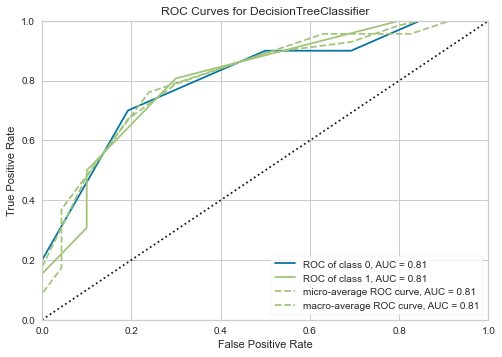

In [86]:
tuned_models = [tuned_dt, tuned_lightgbm, tuned_lr, tuned_rf]
plot_model(tuned_models[0], plot='auc')   

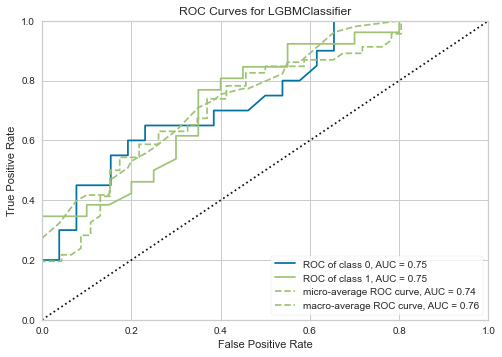

In [85]:
plot_model(tuned_models[1], plot='auc')   

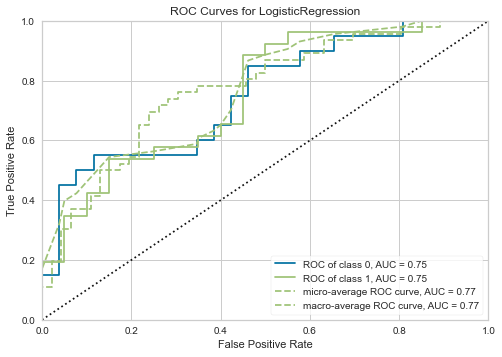

In [87]:
plot_model(tuned_models[2], plot='auc')   

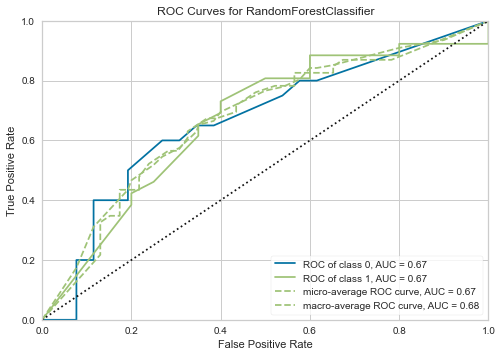

In [88]:
plot_model(tuned_models[3], plot='auc')   

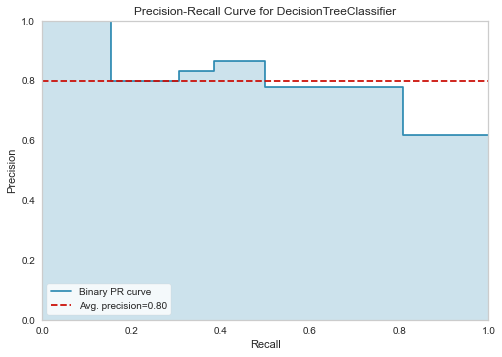

In [89]:
plot_model(tuned_models[0], plot='pr')

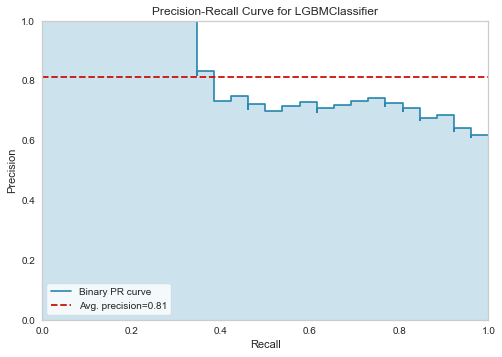

In [90]:
plot_model(tuned_models[1], plot='pr')

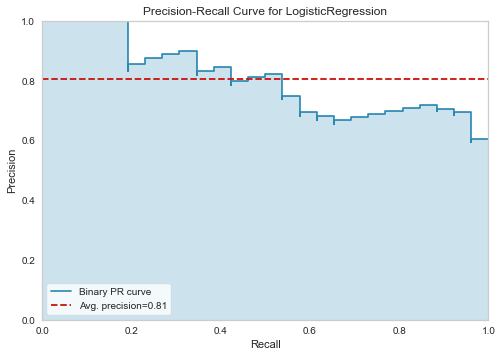

In [91]:
plot_model(tuned_models[2], plot='pr')

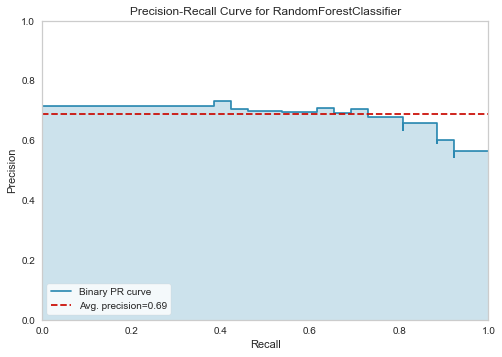

In [93]:
plot_model(tuned_models[3], plot='pr')

### Desicion Tree feature importance

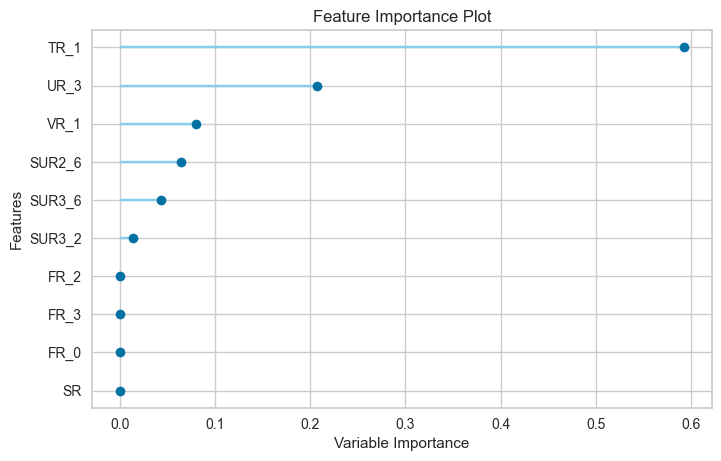

In [95]:
plot_model(tuned_models[0], plot='feature')

### Light GBM feature importance

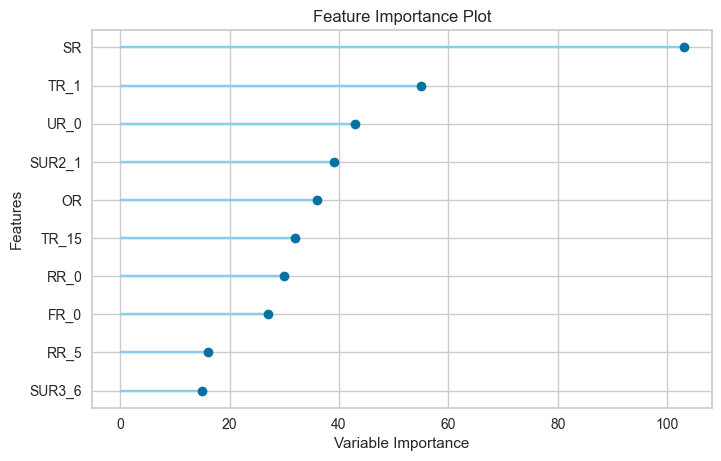

In [96]:
plot_model(tuned_models[1], plot='feature')

### Logistic Regression feature importance

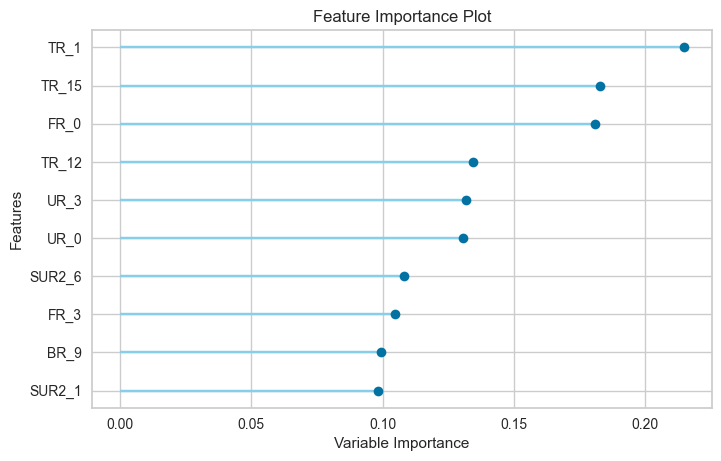

In [97]:
plot_model(tuned_models[2], plot='feature')

### Random Forest feature importance

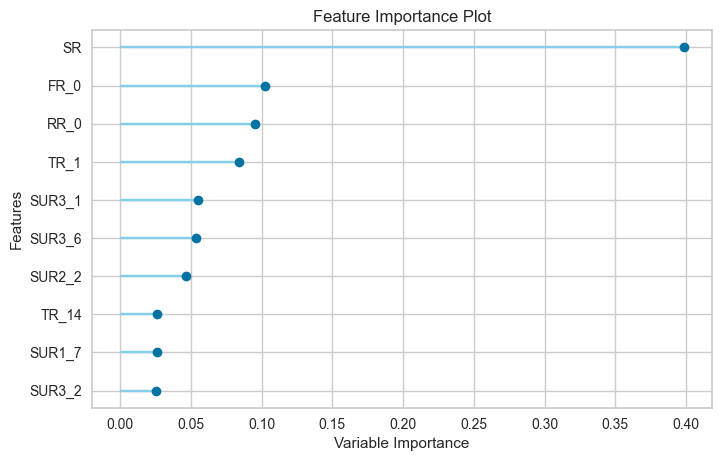

In [98]:
plot_model(tuned_models[3], plot='feature')

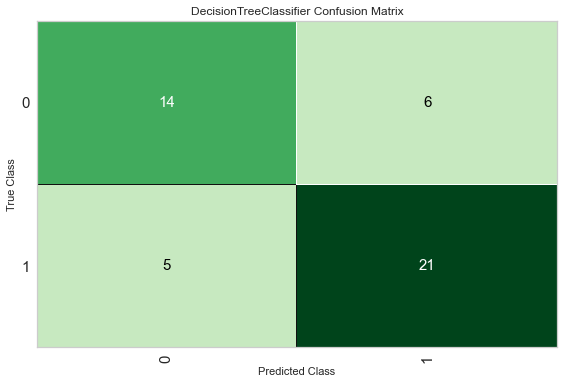

In [99]:
plot_model(tuned_models[0], plot='confusion_matrix')

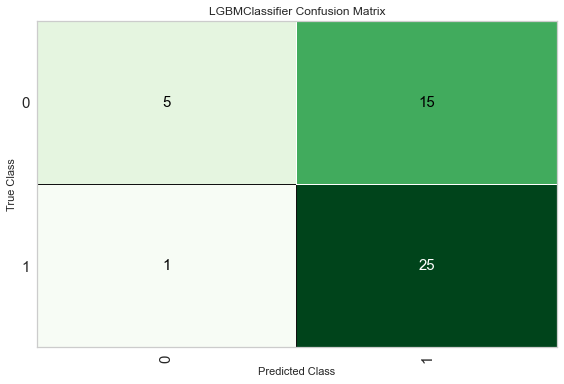

In [100]:
plot_model(tuned_models[1], plot='confusion_matrix')


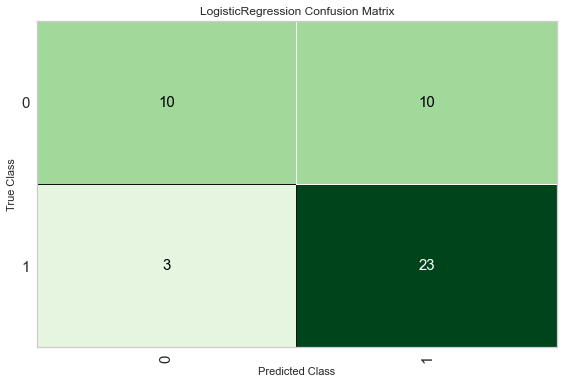

In [101]:
plot_model(tuned_models[2], plot='confusion_matrix')


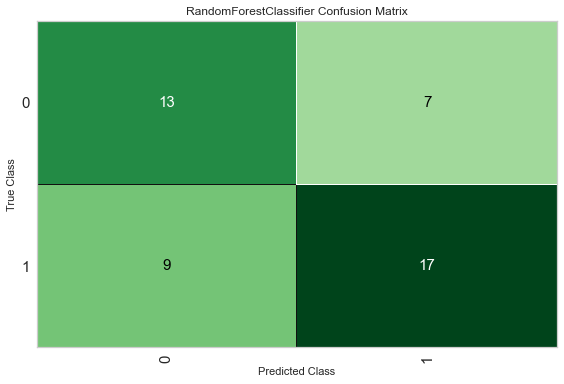

In [102]:
plot_model(tuned_models[3], plot='confusion_matrix')

In [103]:
evaluate_model(tuned_models[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [104]:
evaluate_model(tuned_models[1])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [105]:
evaluate_model(tuned_models[2])


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [106]:
evaluate_model(tuned_models[3])


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Finalize Model

In [107]:
final_dt = finalize_model(tuned_dt)
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


## Predeiction

In [112]:
unseen_prediction = predict_model(final_dt, data=data_unseen)
unseen_prediction

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8684,0.8920,0.8947,0.8500,0.8718,0.7368,0.7379


,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs,Label,Score
0,152,S52,600.0,1.0,1,4,9,2,10,0,0,50.0,0,0,0,1,0,1,0.5882
1,153,S52,2000.0,1.0,1,3,9,2,6,0,0,50.0,0,0,0,1,1,1,0.5882
2,154,S52,26000.0,3.0,1,1,1,2,10,3,4,100.0,1,2,0,1,1,1,0.8000
3,155,S52,350.0,1.0,1,0,2,1,10,3,3,100.0,1,1,0,1,1,1,0.8000
4,156,S52,200.0,1.0,1,3,2,6,5,0,0,50.0,1,1,1,2,1,1,0.5882
5,157,S52,2300.0,1.0,1,2,1,1,6,0,0,100.0,2,1,0,1,1,1,0.6857
6,158,S52,300.0,1.0,15,1,1,1,6,0,0,100.0,1,1,2,1,0,0,0.7500
7,159,S52,600.0,1.0,5,2,6,6,10,3,2,100.0,2,2,0,1,1,0,0.5200
8,160,S52,300.0,1.0,12,3,1,2,10,0,0,100.0,1,2,0,1,0,0,0.5200
9,161,S52,1400.0,1.0,1,1,1,2,10,0,0,100.0,5,5,0,1,1,1,0.6857


## Deal with imbalance data in ML pycaret pipeline

In [50]:
data = df.sample(frac=0.8, random_state=786).reset_index(drop=True)
data = data.drop(data.iloc[:, -7:-1], axis=1)
# data.columns
data_unseen = df.drop(data.index).reset_index(drop=True)
data_unseen = data_unseen.drop(data_unseen.iloc[:, -7:-1], axis=1)

In [51]:
Great_crested_newt = setup(data = data, 
                    target = 'Great crested newt', 
                    session_id=123, 
                    ignore_features=['ID', 'Motorway'],
                    fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,Great crested newt
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(151, 17)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [52]:
best_model = compare_models(fold=30, n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9056,0.3000,0.1333,0.1167,0.1222,nan,0.1081,0.0860
rf,Random Forest Classifier,0.9000,0.3056,0.0333,0.0333,0.0333,nan,0.0222,0.1797
dummy,Dummy Classifier,0.9000,0.2000,0.0000,0.0000,0.0000,nan,0.0000,0.0220
et,Extra Trees Classifier,0.8889,0.3000,0.0333,0.0333,0.0333,nan,0.0222,0.1693
lightgbm,Light Gradient Boosting Machine,0.8833,0.3444,0.1333,0.1333,0.1333,nan,0.1111,0.0397
gbc,Gradient Boosting Classifier,0.8722,0.3111,0.1000,0.1000,0.1000,nan,0.0889,0.0947
qda,Quadratic Discriminant Analysis,0.8611,0.2056,0.0333,0.0333,0.0333,nan,0.0111,0.0243
nb,Naive Bayes,0.8389,0.2000,0.0333,0.0333,0.0333,nan,0.0000,0.0243
ridge,Ridge Classifier,0.8194,0.0000,0.2667,0.1722,0.2000,nan,0.1496,0.0227
lr,Logistic Regression,0.8139,0.2667,0.1667,0.0944,0.1167,nan,0.0688,0.6543


In [53]:
for i in range(3):
    print(best_model[i])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
DummyClassifier(constant=None, random_state=123, strategy='prior')


In [59]:
ada = create_model('ada')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8182,0.8000,1.0000,0.3333,0.5000,0.4211,0.5164
2,0.9091,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7273,0.7222,0.0000,0.0000,0.0000,-0.1379,-0.1491
4,0.8182,0.7222,0.5000,0.5000,0.5000,0.3889,0.3889
5,0.9000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8000,0.7778,0.0000,0.0000,0.0000,-0.1111,-0.1111
7,0.8000,0.2222,0.0000,0.0000,0.0000,-0.1111,-0.1111
8,0.9000,0.4444,0.0000,0.0000,0.0000,0.0000,0.0000


In [58]:
tuned_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8182,0.9000,0.0000,0.0000,0.0000,-0.1000,-0.1000
2,0.9091,0.7000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6364,0.5556,0.0000,0.0000,0.0000,-0.2222,-0.2222
4,0.8182,0.7778,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9000,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [60]:
evaluate_model(tuned_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [61]:
final_ada = finalize_model(tuned_ada)

In [62]:
unseen_prediction = predict_model(final_ada, data=data_unseen)
unseen_prediction

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9211,0.9485,0.5000,0.6667,0.5714,0.5289,0.5356


,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Great crested newt,Label,Score
0,152,S52,600.0,1.0,1,4,9,2,10,0,0,50.0,0,0,0,1,0,0,0.5962
1,153,S52,2000.0,1.0,1,3,9,2,6,0,0,50.0,0,0,0,1,0,0,0.5720
2,154,S52,26000.0,3.0,1,1,1,2,10,3,4,100.0,1,2,0,1,0,1,0.5039
3,155,S52,350.0,1.0,1,0,2,1,10,3,3,100.0,1,1,0,1,0,0,0.6162
4,156,S52,200.0,1.0,1,3,2,6,5,0,0,50.0,1,1,1,2,0,0,0.5502
5,157,S52,2300.0,1.0,1,2,1,1,6,0,0,100.0,2,1,0,1,0,0,0.5736
6,158,S52,300.0,1.0,15,1,1,1,6,0,0,100.0,1,1,2,1,0,0,0.5880
7,159,S52,600.0,1.0,5,2,6,6,10,3,2,100.0,2,2,0,1,0,0,0.5537
8,160,S52,300.0,1.0,12,3,1,2,10,0,0,100.0,1,2,0,1,0,0,0.5481
9,161,S52,1400.0,1.0,1,1,1,2,10,0,0,100.0,5,5,0,1,0,0,0.5185
